In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.33, random_state=None) 
train_Features[:2]

array([[-0.57212968, -0.34192804, -0.77851817,  0.49709399,  0.28453049,
         0.1403009 ,  0.12602959,  0.25425177,  1.357713  ,  0.12128991],
       [-0.79812483, -0.27645176, -0.78486621,  1.2842572 ,  0.90439571,
         0.46953935,  0.05328079, -0.93380359,  1.16896028, -0.91535112]])

In [4]:
test_Features[:2]

array([[ 3.46653392,  3.85179192,  1.06114612, -0.52091207, -0.18783395,
        -2.31261884, -4.70018023,  1.86589891, -0.73010974,  0.27364542],
       [-0.48778633, -0.65658159, -0.54660282,  1.26839359,  1.06456527,
         0.10671055, -0.47010627,  0.44250358,  1.89828058, -1.06381527]])

In [5]:
train_Label[:4]

array([0, 1, 1, 1])

In [6]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [7]:
train_Features.shape

(12743, 10, 1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Conv1D(filters=10*9,
                 kernel_size=1,
                 padding='valid',
                 input_shape=(10,1), 
                 activation='relu'))

In [11]:
model.add(MaxPooling1D(pool_size=1))

In [12]:
model.add(Conv1D(filters=10*8,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [13]:
model.add(MaxPooling1D(pool_size=1))

In [14]:
model.add(Conv1D(filters=10*7,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [15]:
model.add(MaxPooling1D(pool_size=1))

In [16]:
model.add(Conv1D(filters=10*6,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [17]:
model.add(MaxPooling1D(pool_size=1))

In [18]:
model.add(Conv1D(filters=10*5,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [19]:
model.add(MaxPooling1D(pool_size=1))

In [20]:
model.add(Conv1D(filters=10*4,
                 kernel_size=3,
                 padding='valid',
                 activation='relu'))

In [21]:
model.add(MaxPooling1D(pool_size=1))

In [22]:
model.add(Conv1D(filters=10*3,
                 kernel_size=3,
                 padding='valid',
                 activation='relu'))

In [23]:
model.add(MaxPooling1D(pool_size=1))

In [24]:
model.add(Conv1D(filters=10*2,
                 kernel_size=3,
                 padding='valid',
                 activation='relu'))

In [25]:
model.add(MaxPooling1D(pool_size=1))

In [26]:
model.add(Conv1D(filters=10,
                 kernel_size=3,
                 padding='valid',
                 activation='relu'))

In [27]:
model.add(MaxPooling1D(pool_size=1))

In [28]:
model.add(Flatten())

In [29]:
model.add(Dense(10, activation='tanh'))

In [30]:
model.add(Dense(1,activation='sigmoid'))

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 10, 90)            180       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 90)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 80)            7280      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 80)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 10, 70)            5670      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 10, 70)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 10, 60)            4260      
__________

In [32]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [33]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=400,verbose=1)

Train on 10194 samples, validate on 2549 samples
Epoch 1/30
10194/10194 [==============================] - 4s 382us/step - loss: 0.6456 - acc: 0.6691 - val_loss: 0.5461 - val_acc: 0.7297
Epoch 2/30
10194/10194 [==============================] - 3s 251us/step - loss: 0.4570 - acc: 0.8010 - val_loss: 0.3939 - val_acc: 0.8364
Epoch 3/30
10194/10194 [==============================] - 3s 264us/step - loss: 0.3813 - acc: 0.8427 - val_loss: 0.3696 - val_acc: 0.8395
Epoch 4/30
10194/10194 [==============================] - 3s 261us/step - loss: 0.3597 - acc: 0.8531 - val_loss: 0.3488 - val_acc: 0.8529
Epoch 5/30
10194/10194 [==============================] - 3s 261us/step - loss: 0.3516 - acc: 0.8546 - val_loss: 0.3482 - val_acc: 0.8517
Epoch 6/30
10194/10194 [==============================] - 3s 259us/step - loss: 0.3498 - acc: 0.8568 - val_loss: 0.3444 - val_acc: 0.8548
Epoch 7/30
10194/10194 [==============================] - 3s 260us/step - loss: 0.3412 - acc: 0.8597 - val_loss: 0.3680 - v

In [34]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

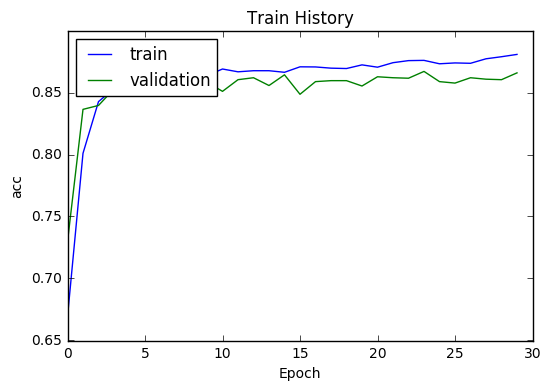

In [35]:
show_train_history(train_history,'acc','val_acc')

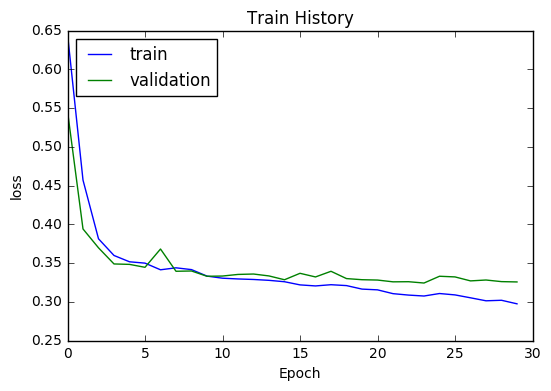

In [36]:
show_train_history(train_history,'loss','val_loss')

In [37]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

6277/6277 [==============================] - 1s 106us/step


In [38]:
scores[1]

0.8661781105623706